In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [3]:
#Importing data and setting x and y variables
insurance = pd.read_csv('insuranceData.csv')
X = insurance.iloc[:, :-1].values
y = insurance.iloc[:,4].values

insurance.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


<AxesSubplot:>

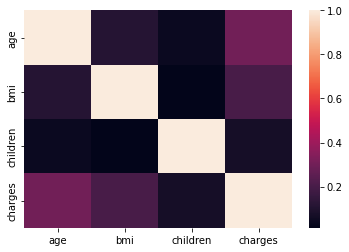

In [20]:
#Data Visualization
#Building the Correlation matrix
sns.heatmap(insurance.corr())
#correlations between variables are generally low

In [5]:
#Encoding categorical data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()


TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [11]:
print(X[0])

[19 27.9 0 1]


In [12]:
#Avoiding the Dummy variable trap
X = X[:,1:]

In [13]:
#Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 0)

In [14]:
#Fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
#Predicting the test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[ 8205.14996618  7890.57790224 36010.90090104 10736.64229389
  3031.52173988  4291.70500806  6163.97729221 11686.77637274
  9346.43601755  9670.48314365  5097.81814197  7265.46808248
  8091.44922018  5404.07730644 30300.73987285  8569.48091987
  5407.8673313   9073.06566065  8417.63564196 31128.86030623
 30034.03168625 10145.88698118  7892.22863143 30046.80820679
  8989.44083034 10909.33270857  2743.47985001 10403.85295536
  5946.05086238  8885.703713    8770.35223781 35660.07931762
 10365.21985695 10327.31960828 27276.30002923  6776.06630818
 11794.54779819 33863.6075308  33058.47152987  8811.3096616
  3715.62122832  6779.85633305 29508.62467571 34642.70192416
 33465.41063655  9713.82414637  8444.41009927  6732.72530546
  5076.48443871  5847.75449909  9404.44855324  8482.31034794
 30679.98664277 35247.45517364 12074.52107183  9620.47997064
  9614.79493334  6199.98252844  8706.41038157  5976.61534456
  7067.89822292 32907.11481845 10445.54322889  9569.80320144
 11967.48249612 11729.873

In [16]:
#Calculating the Coefficients 
print(regressor.coef_)

[  379.00248667   568.74801325 23308.64214727]


In [17]:
#Calculating the intercept
print(regressor.intercept_)

-3809.4731445180187


In [18]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7029041544100425

In [ ]:
#The r2 value suggests the model is not a great model for the data 